<a href="https://colab.research.google.com/github/arzss-code/jobsheet-machine-learning/blob/main/Artificial_Neural_Network_TI_2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dengan menggunakan pengetahuan yang Anda dapatkan pada sesi kali ini, analisalah kasus-kasus berikut dan bandingkan hasil antar-algoritma artificial neural network (ANN):
1. Kasus Regresi: https://www.kaggle.com/datasets/prathamtripathi/regression-with-neural-networking
2. Kasus Klasifikasi: https://www.kaggle.com/datasets/deepu1109/star-dataset

Pastikan Anda membaca dan pahami baik-baik masing-masing _link_ mengenai deskripsi dari dataset yang akan Anda olah tersebut.

# Regresi

### 1. Regresi dengan MLPRegressor

Dataset shape: (1030, 9)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB
None
Descriptive Statistics:
            Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.

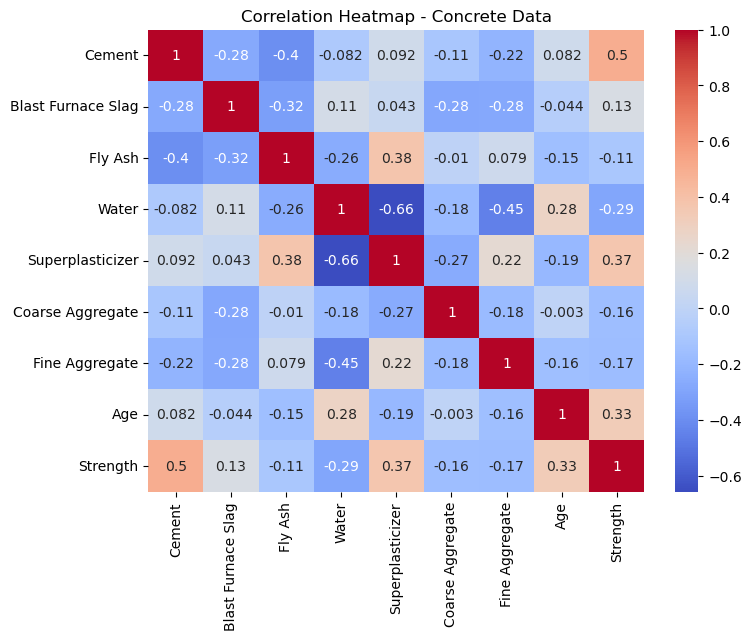


Training MLPRegressor with GridSearchCV...
Best parameters: {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01}

Evaluation Metrics for MLPRegressor:
MSE: 32.11884278681756
RMSE: 5.667348832286359
MAE: 4.325557777566727
R2 Score: 0.8753522590134295


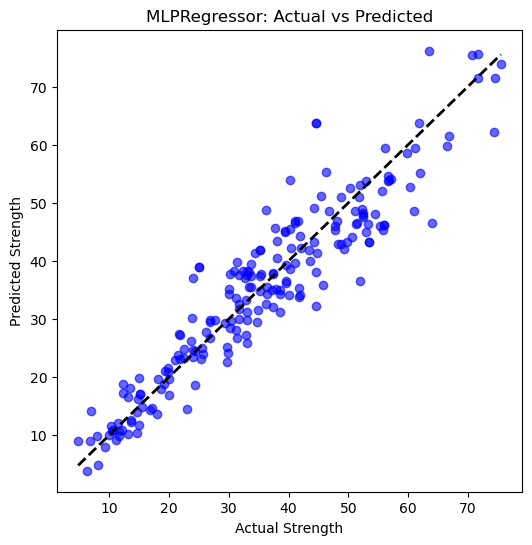

In [ ]:
# regression_mlp.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

# --- Load dan Eksplorasi Dataset ---
df = pd.read_csv("concrete_data.csv")
print("Dataset shape:", df.shape)
print("Dataset Info:")
print(df.info())
print("Descriptive Statistics:")
print(df.describe())

# Tangani missing values jika ada
if df.isnull().sum().sum() > 0:
    print("Missing values detected. Dropping missing values...")
    df = df.dropna()

# Visualisasi heatmap korelasi
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - Concrete Data")
plt.show()

# --- Persiapan Data ---
X = df.drop("Strength", axis=1).values
y = df["Strength"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Model: MLPRegressor dengan GridSearchCV ---
print("\nTraining MLPRegressor with GridSearchCV...")
mlp_reg = MLPRegressor(max_iter=500, random_state=42)
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50,25)],
    'learning_rate_init': [0.001, 0.01]
}
grid_search = GridSearchCV(mlp_reg, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_mlp_reg = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# --- Evaluasi Model ---
y_pred = best_mlp_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics for MLPRegressor:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("MLPRegressor: Actual vs Predicted")
plt.show()


### 2. Regresi dengan GRNN

In [ ]:
# regression_grnn_lib.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

# --- Load dan Eksplorasi Dataset ---
df = pd.read_csv("concrete_data.csv")
print("Dataset shape:", df.shape)
print("Dataset Info:")
print(df.info())
print("Descriptive Statistics:")
print(df.describe())

if df.isnull().sum().sum() > 0:
    print("Missing values detected. Dropping missing values...")
    df = df.dropna()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - Concrete Data")
plt.show()

# --- Persiapan Data ---
X = df.drop("Strength", axis=1).values
y = df["Strength"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# --- Definisi Fungsi Pembobot Gaussian ---
def gaussian_weight(distances):
    sigma = 0.1  # Parameter sigma GRNN
    return np.exp(- (distances ** 2) / (2 * sigma ** 2))

# --- Model: GRNN menggunakan KNeighborsRegressor ---
# n_neighbors diset ke jumlah data training agar seluruh sampel ikut serta.
grnn = KNeighborsRegressor(n_neighbors=len(X_train), weights=gaussian_weight, algorithm='brute')
grnn.fit(X_train, y_train)

# --- Evaluasi Model ---
y_pred = grnn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics for GRNN (using KNeighborsRegressor):")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("GRNN (KNeighborsRegressor): Actual vs Predicted")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'concrete_data.csv'

### 3. Regresi dengan LVQRegressor

Dataset shape: (1030, 9)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB
None
Descriptive Statistics:
            Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.

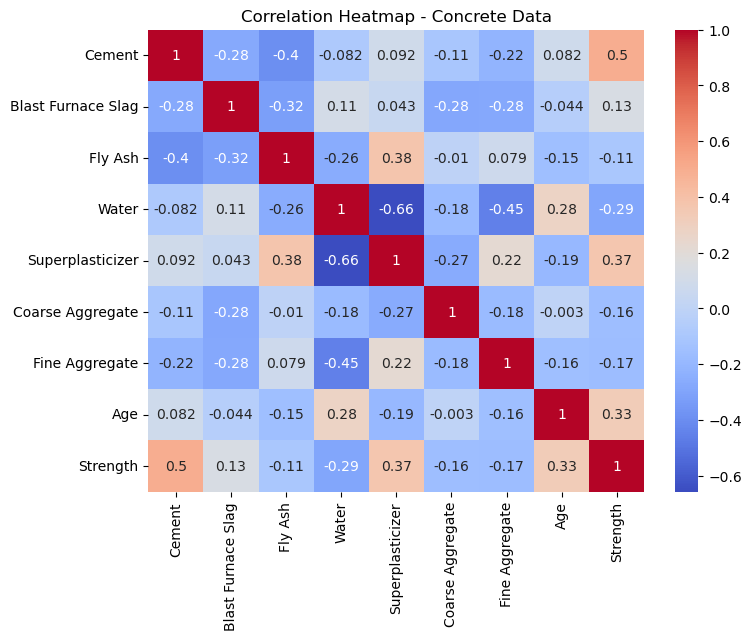


Training LVQRegressor (custom implementation)...

Evaluation Metrics for LVQRegressor:
MSE: 164.23142168041338
RMSE: 12.815280788200209
MAE: 10.511213511704812
R2 Score: 0.36264591326191


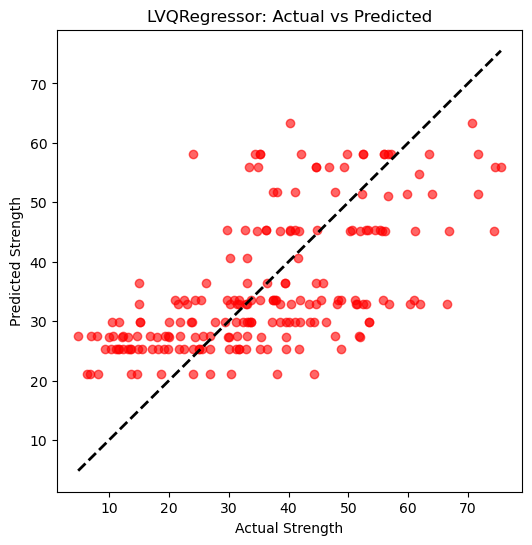

In [ ]:
# regression_lvq.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

# --- Custom LVQRegressor untuk regresi ---
class LVQRegressor:
    """
    Implementasi sederhana LVQ untuk masalah regresi.
    Inisialisasi sejumlah prototipe secara acak, update selama training, dan prediksi menggunakan prototipe terdekat.
    """
    def __init__(self, n_prototypes=10, learning_rate=0.01, n_epochs=50):
        self.n_prototypes = n_prototypes
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs

    def fit(self, X, y):
        idx = np.random.choice(range(X.shape[0]), self.n_prototypes, replace=False)
        self.prototypes_X = X[idx].copy()
        self.prototypes_y = y[idx].copy()

        for epoch in range(self.n_epochs):
            indices = np.random.permutation(X.shape[0])
            for i in indices:
                x_sample = X[i]
                y_sample = y[i]
                distances = np.linalg.norm(self.prototypes_X - x_sample, axis=1)
                j = np.argmin(distances)
                self.prototypes_X[j] += self.learning_rate * (x_sample - self.prototypes_X[j])
                self.prototypes_y[j] += self.learning_rate * (y_sample - self.prototypes_y[j])
        return self

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.linalg.norm(self.prototypes_X - x, axis=1)
            j = np.argmin(distances)
            predictions.append(self.prototypes_y[j])
        return np.array(predictions)

# --- Load dan Eksplorasi Dataset ---
df = pd.read_csv("concrete_data.csv")
print("Dataset shape:", df.shape)
print("Dataset Info:")
print(df.info())
print("Descriptive Statistics:")
print(df.describe())

if df.isnull().sum().sum() > 0:
    print("Missing values detected. Dropping missing values...")
    df = df.dropna()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - Concrete Data")
plt.show()

# --- Persiapan Data ---
X = df.drop("Strength", axis=1).values
y = df["Strength"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Model: LVQRegressor ---
print("\nTraining LVQRegressor (custom implementation)...")
lvq = LVQRegressor(n_prototypes=20, learning_rate=0.01, n_epochs=100)
lvq.fit(X_train, y_train)

# --- Evaluasi Model ---
y_pred = lvq.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics for LVQRegressor:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("LVQRegressor: Actual vs Predicted")
plt.show()


# Klasifikasi


### 1. Klasifikasi dengan MLPClassifier

Dataset shape: (240, 7)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB
None
Descriptive Statistics:
       Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  \
count       240.000000        240.000000    240.000000   
mean      10497.462500     107188.361635    237.157781   
std        9552.425037     179432.244940    517.155763   
min        1939.000000          0.000080      0.008400   

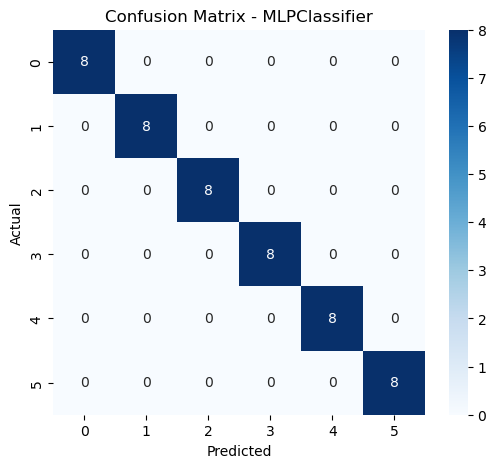

In [ ]:
# classification_mlp.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

# --- Load dan Eksplorasi Dataset ---
df = pd.read_csv("6 class csv.csv")
print("Dataset shape:", df.shape)
print("Dataset Info:")
print(df.info())
print("Descriptive Statistics:")
print(df.describe())

if df.isnull().sum().sum() > 0:
    print("Missing values detected. Dropping missing values...")
    df = df.dropna()

# Encoding untuk fitur kategorikal: Star color dan Spectral Class
le_color = LabelEncoder()
le_spec = LabelEncoder()
df['Star color'] = le_color.fit_transform(df['Star color'])
df['Spectral Class'] = le_spec.fit_transform(df['Spectral Class'])

# --- Persiapan Data ---
X = df.drop("Star type", axis=1).values
y = df["Star type"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# --- Model: MLPClassifier dengan GridSearchCV ---
print("\nTraining MLPClassifier with GridSearchCV...")
mlp_clf = MLPClassifier(max_iter=500, random_state=42)
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50,25)],
    'learning_rate_init': [0.001, 0.01]
}
grid_search = GridSearchCV(mlp_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_mlp_clf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# --- Evaluasi Model ---
y_pred = best_mlp_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("\nAccuracy for MLPClassifier:", acc)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - MLPClassifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 2. Klasifikasi dengan PNN

In [ ]:
# classification_pnn.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

# --- Load dan Eksplorasi Dataset ---
df = pd.read_csv("6 class csv.csv")
print("Dataset shape:", df.shape)
print("Dataset Info:")
print(df.info())
print("Descriptive Statistics:")
print(df.describe())

if df.isnull().sum().sum() > 0:
    df = df.dropna()

# Lakukan encoding untuk fitur kategorikal
le_color = LabelEncoder()
le_spec = LabelEncoder()
df['Star color'] = le_color.fit_transform(df['Star color'])
df['Spectral Class'] = le_spec.fit_transform(df['Spectral Class'])

# --- Persiapan Data ---
X = df.drop("Star type", axis=1).values
y = df["Star type"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# --- Fungsi Pembobot Gaussian ---
def gaussian_weight(distances):
    sigma = 0.1  # Parameter sigma PNN
    return np.exp(- (distances ** 2) / (2 * sigma ** 2))

# --- Model: PNN menggunakan KNeighborsClassifier ---
# Gunakan seluruh data training (n_neighbors = len(X_train))
pnn = KNeighborsClassifier(n_neighbors=len(X_train), weights=gaussian_weight, algorithm='brute')
pnn.fit(X_train, y_train)

# --- Evaluasi Model ---
y_pred = pnn.predict(X_test)
print("\nAccuracy for PNN (KNeighborsClassifier):", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - PNN (KNeighborsClassifier)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


ImportError: cannot import name 'MutableSet' from 'collections' (c:\Users\ARYA\anaconda3\Lib\collections\__init__.py)

### 3. Klasifikasi dengan SOMClassifier

Dataset shape: (240, 7)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB
None
Descriptive Statistics:
       Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  \
count       240.000000        240.000000    240.000000   
mean      10497.462500     107188.361635    237.157781   
std        9552.425037     179432.244940    517.155763   
min        1939.000000          0.000080      0.008400   

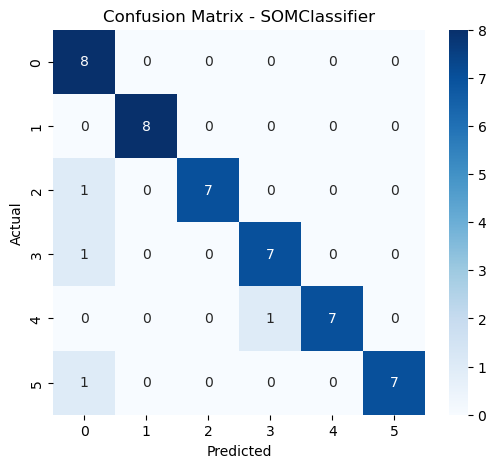

In [ ]:
# classification_som.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from minisom import MiniSom
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

# --- Load dan Eksplorasi Dataset ---
df = pd.read_csv("6 class csv.csv")
print("Dataset shape:", df.shape)
print("Dataset Info:")
print(df.info())
print("Descriptive Statistics:")
print(df.describe())

if df.isnull().sum().sum() > 0:
    df = df.dropna()

# Lakukan encoding untuk fitur kategorikal
le_color = LabelEncoder()
le_spec = LabelEncoder()
df['Star color'] = le_color.fit_transform(df['Star color'])
df['Spectral Class'] = le_spec.fit_transform(df['Spectral Class'])

# --- Persiapan Data ---
X = df.drop("Star type", axis=1).values
y = df["Star type"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# --- Training SOM menggunakan MiniSom ---
n_inputs = X_train.shape[1]
n_outputs = 10  # Misalnya, gunakan 10 neuron; sesuaikan sesuai kebutuhan

som = MiniSom(x=n_outputs, y=1, input_len=n_inputs, sigma=1.0, learning_rate=0.5, random_seed=42)
som.random_weights_init(X_train)
print("\nTraining SOM (MiniSom)...")
som.train_random(data=X_train, num_iteration=1000)

# --- Buat Mapping dari Neuron (BMU) ke Label Mayoritas ---
neuron_labels = {}
for i, x in enumerate(X_train):
    winner = som.winner(x)
    if winner in neuron_labels:
        neuron_labels[winner].append(y_train[i])
    else:
        neuron_labels[winner] = [y_train[i]]
# Ambil mayoritas label untuk tiap neuron
for key in neuron_labels:
    neuron_labels[key] = np.bincount(neuron_labels[key]).argmax()

# --- Prediksi untuk Data Test ---
y_pred = []
for x in X_test:
    winner = som.winner(x)
    y_pred.append(neuron_labels.get(winner, 0))
y_pred = np.array(y_pred)

print("\nAccuracy for SOM (MiniSom):", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - SOM (MiniSom)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
